기술통계분석 + 그래프 : 와인 품질 등급 예측
  - 목표 : 와인의 속성을 분석-> 품질 등급을 예측
  - 기술통계
    - 데이터의 특성을 수치를 이용해서 나타냄 기본통계
    - 평균,중앙값,최빈값 등
  - 레드와인과 화이트 와인 그룹의 품질에 대한 t-검증  수행
  - 와인속성을 독립변수, 품질등급을 종속 변수 선형 회귀 분석
    - 회귀분석
      - 종속변수,독립변수간의 연관성
      - 두 변수간의 인관관계를 분석할때
      - 독립변수가 한개: 단순 회귀분석, 두개 이상이면 다중 회귀 분석
      - 변수들간의 관계에 따라서 선형회귀(일차원방정식), 비선형회귀(다차원)
  - t-검증
    - 평균으로 두 그룹에 차이가 있는지 확인방법
    - A와 B의 품질이 1등급인지 2등급인지에 따라 가격에 차이가 있는지 확인

와인데이터
  - 캘리포니아 어반대학의 자료실...
  - https://archive.ics.uci.edu/

In [4]:
!unzip '/content/wine+quality.zip'

Archive:  /content/wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [5]:
import pandas as pd
red_df = pd.read_csv('/content/winequality-red.csv',sep=';')
white_df = pd.read_csv('/content/winequality-white.csv',sep=';')

In [6]:
# 레드와인과 화이트와인 병합
red_df['type'] = 'red'
white_df['type'] = 'white'
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
# 병합하기전 두 df의 모양을 확인
red_df.shape,  white_df.shape

((1599, 13), (4898, 13))

In [8]:
wine = pd.concat([ red_df,white_df])
wine=wine.reset_index(drop=True)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
# 컬럼명의 공백을 - 로 치환
wine.columns = wine.columns.str.replace(' ','_')

In [10]:
# 기술통계
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
# 종속변수(y)가 수치형(범주형)-->기수형 데이터
sorted(wine['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

In [12]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [13]:
# describe()함수로 그룹 비교
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [14]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


In [15]:
# T-검정과 회귀분석으로 그룹 비교
# T-검정 scipy
# 회귀분석 statemodels
!pip install statsmodels

In [16]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [17]:
red_wine_quality = red_df['quality']
white_wine_quality = white_df['quality']
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False) # 두 표본의 분산이 같지 않다는 가정하에

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [18]:
temp = ''.join(list(map( lambda x: x+'+', wine.columns))[:-2])[:-1]
Rformula = 'quality~'+temp
Rformula

'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol'

In [19]:
print(len(wine))
wine2 = wine.sample(len(wine))
split_len = int(len(wine2)*0.8)
train_wine = wine2[:split_len]
test_wine = wine2[split_len:]
len(wine2), len(train_wine), len(test_wine)

6497


(6497, 5197, 1300)

In [20]:
regression_result =  ols(Rformula,data=train_wine).fit()  # ols 라는 회귀 분석 모델로 데이터를 학습

In [21]:
regression_result.summary()
# R-squared 결정계수로 1에가까울 수록 성능이 좋다(회귀모델을 설명하는 값)
# F-statistic 0에 가까울수록 좋음  F 통계량
# Prob (F-statistic): 회귀식이 유의미한지 판단 0.05이하일 경우 (변수끼리 매우 관련이 있다고 판단)
# AIC : 표본의 개수와 모델의 복잡성을 기반으로 평가 수치가 낮을수록 좋음
# BIC : AIC와 비슷하고 여기에 패널티를 부과 수치가 낮을수록 좋음
# T 는 독립변수와 종속변수간의 상관관계 : 값이 클수록 상관도가 큼
# P>|t| p_value : 독립변수들의 유의확률 0.05보다 작아야 유의미함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:24:05   Log-Likelihood:                -5766.6
No. Observations:                5197   AIC:                         1.156e+04
Df Residuals:                    5185   BIC:                         1.164e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               53.1412     13.093      4.059      0.000      27.472      78.810
fixed_acidity            0.0753      0.017      4.392      0.000       0.042       0.109
volatile_acidity        -1.3240      0.087    -15.233      0.000      -1.494      -1.154
citric_acid             -0.1210      0.089     -1.367      0.172      -0.295       0.053
residual_sugar           0.0424      0.006      7.411      0.000       0.031       0.054
chlorides               -0.5723      0.357     -1.602      0.109      -1.273       0.128
free_sulfur_dioxide      0.0074      0.001      8.580      0.000       0.006       0.009
total_sulfur_dioxide    -0.0027      0.000     -8.666      0.000      -0.003      -0.002
density                -52.4441     13.363     -3.924      0.000     -78.642     -26.246
pH                       0.4707      0.101      4.671      0.000       0.273       0.668
sulphates                0.7077      0.084      8.443      0.000       0.543       0.872
alcohol                  0.2654      0.018     14.371      0.000       0.229       0.302
==============================================================================
Omnibus:                      102.633   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.298
Skew:                          -0.004   Prob(JB):                     3.96e-48
Kurtosis:                       4.004   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

회귀 분석 모델로 새로운 샘플의 품질 등급 예측

In [22]:
# wine.columns[:-2]
sample1 = test_wine[test_wine.columns.difference(['quality','type'])]  # 'quality','type' 만 제외
# sample1 = sample1.head(5)
sample1_predict =  regression_result.predict(sample1)
sample1_predict = round(sample1_predict)
import numpy as np
sample1_predict = np.array(sample1_predict)
sample1_predict = sample1_predict.astype(int)
sample1_predict

array([5, 6, 6, ..., 6, 5, 5])

In [23]:
# 정답의 확률 accuracy 라고함
(np.array(test_wine['quality']) == sample1_predict).sum() / len(test_wine)
# AI에서는 최소 75% 이상 나와야 의미가 있음  좀 쓸만한경우는 최소 85%
# 의료는 99%

0.5384615384615384

결과 시각화

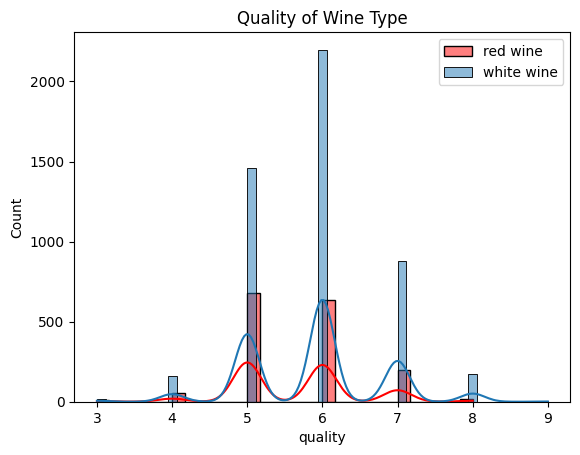

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(red_wine_quality,kde=True, color='red',label='red wine')
sns.histplot(white_wine_quality,kde=True, label='white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

In [25]:
# 독립변수가 2개이상인 경우 부분 회귀 플랏을 사용해서 하나의 독립변수가 종속 변수에 미치는 영향력을 시각화 - 결과를 분석

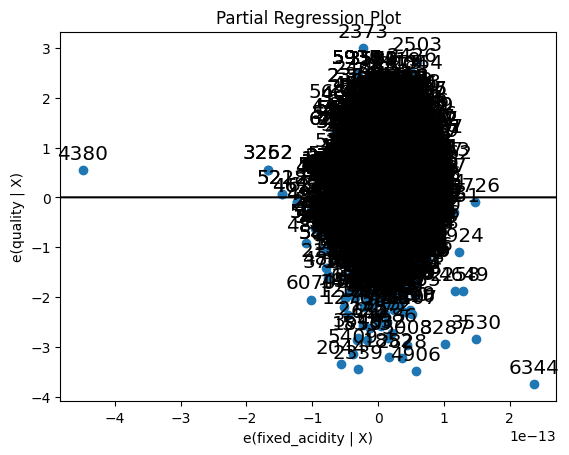

In [26]:
import statsmodels.api as sm
others = list(wine.columns.difference(['quality', 'type']))
p, resids =  sm.graphics.plot_partregress('quality','fixed_acidity',others,data=wine,ret_coords=True)
plt.show()

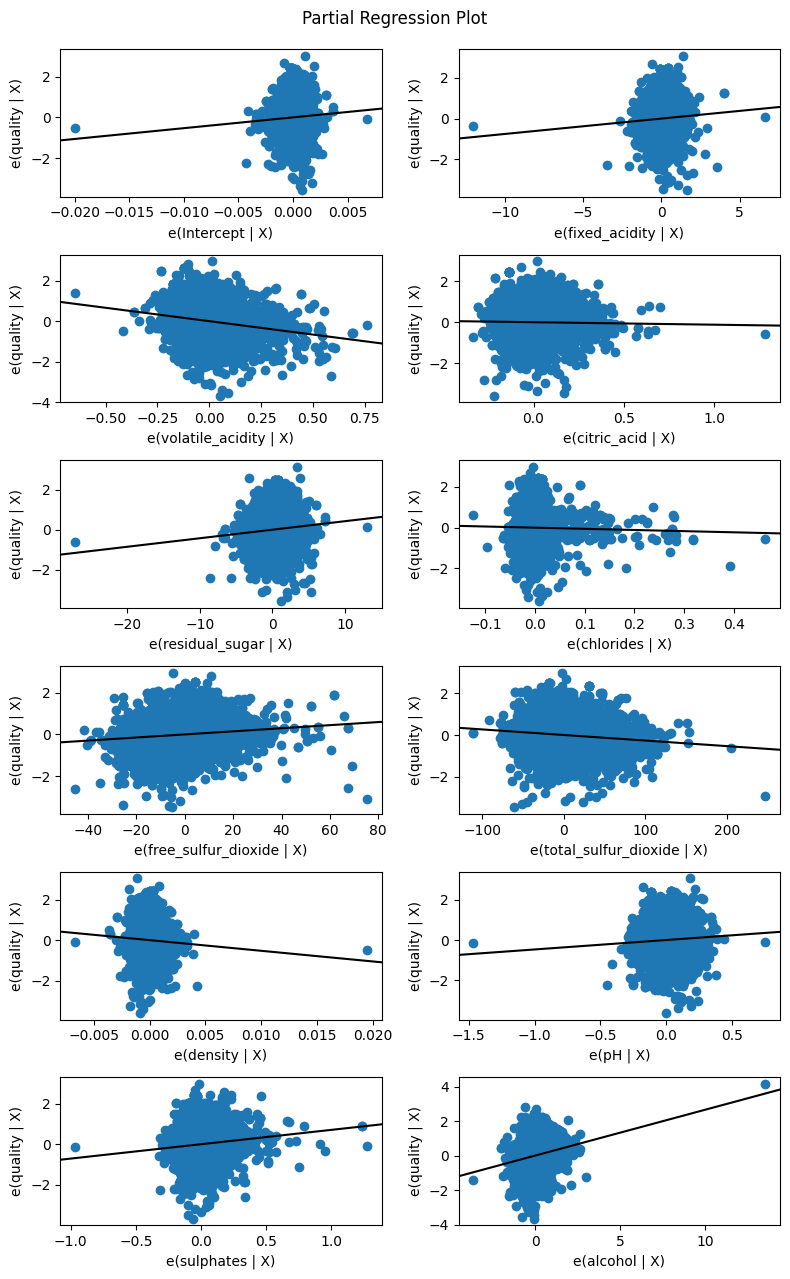

In [27]:
fig =  plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result,fig=fig)
plt.show()

상관분석 + 히트맵 : 타이나틱호 생존율 분석
  - 두 변수가 선형적 관계에 있는지를 분석하는 방법 (인과관계는 아님)


In [28]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [30]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [32]:
df = titanic.drop(columns=['deck'])
age_fillna = df.groupby(['pclass','sex'])['age'].transform('mean')
df['age'] = df['age'].fillna(age_fillna)

In [33]:
df['embarked'].value_counts()
df['embarked'] = df['embarked'].fillna('S')

In [34]:
df = df.drop(columns=['embark_town'])

In [35]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [36]:
# 남자 승객의 생존율
# 여성 승객의 생존율

In [37]:
print( (df[df['survived'] == 1]['sex'] == 'female').sum() / len(df) )
print( (df[df['survived'] == 1]['sex'] == 'male').sum() / len(df) )

0.2615039281705948
0.122334455667789


등급별 생존자 수를 차트로 시각화

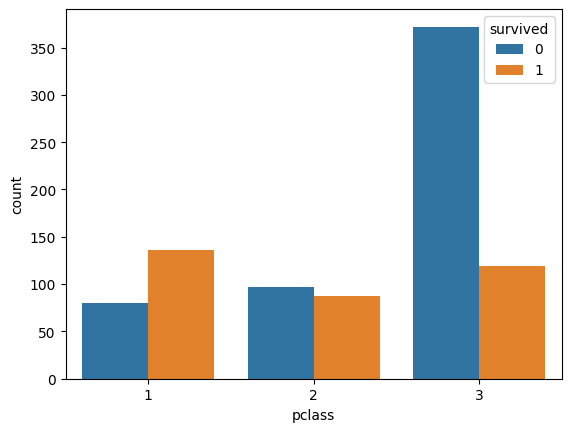

In [38]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
sns.countplot(data = titanic, x='pclass',hue='survived')
plt.show()

데이터 모델링
  - 상관분석을 위한 상관계수 구하고 필요하면 저장하기

In [40]:
titanic_corr = titanic.corr(method = 'pearson',numeric_only =True)
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


산점도로 상관분석 시각화

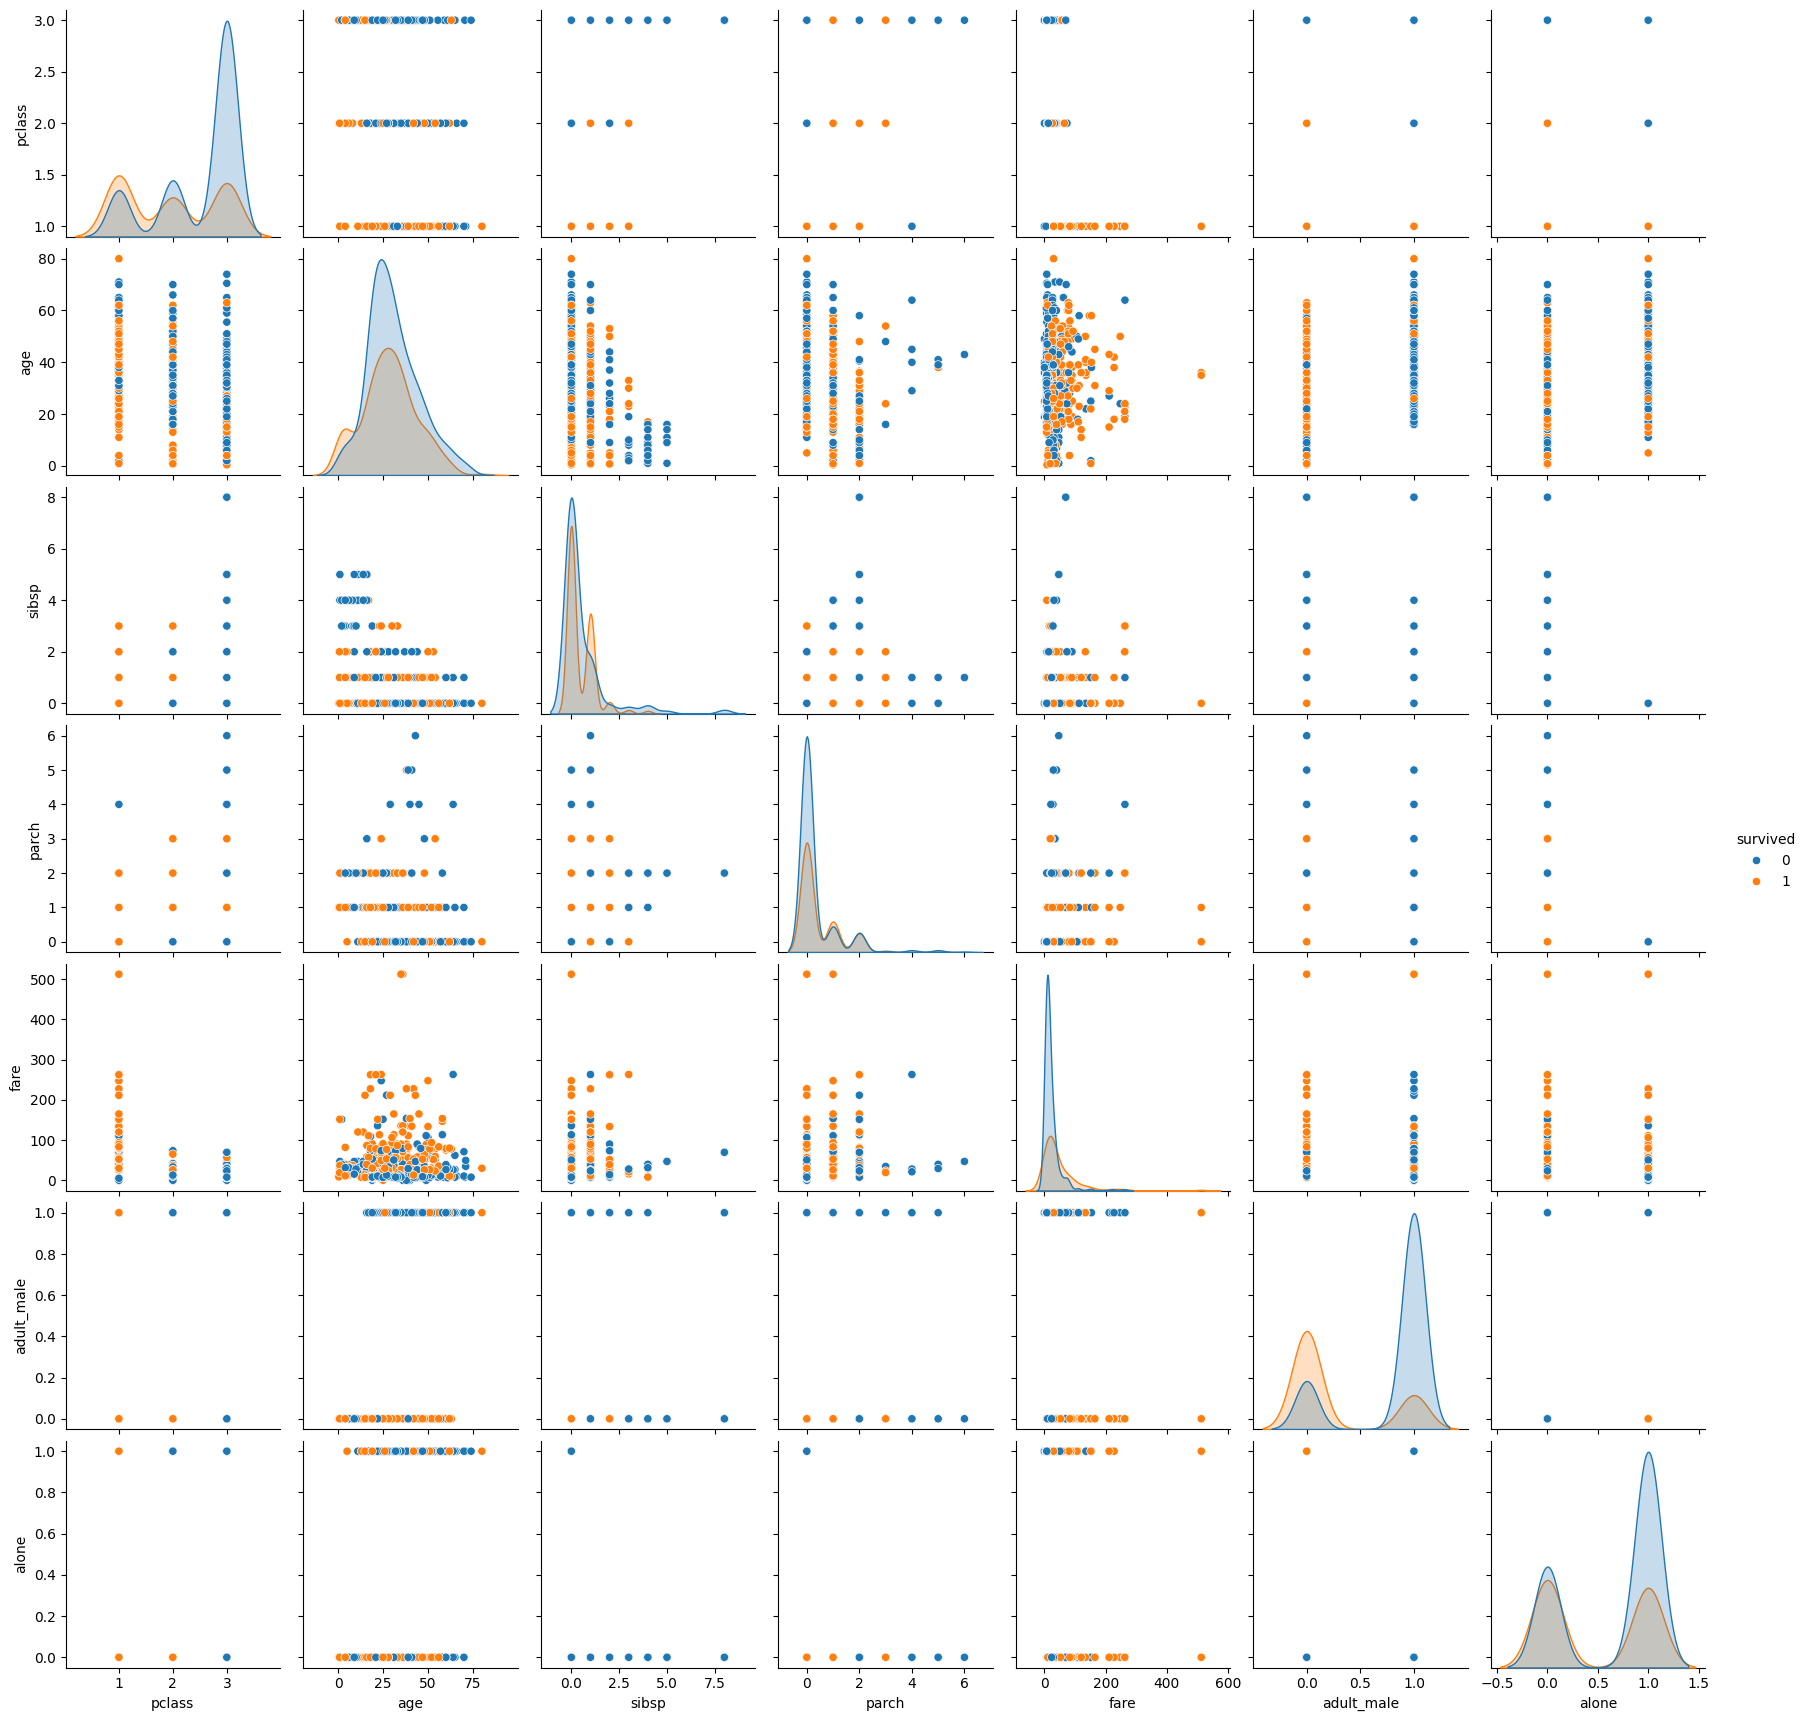

In [42]:
sns.pairplot(data=titanic, hue='survived')
plt.show()

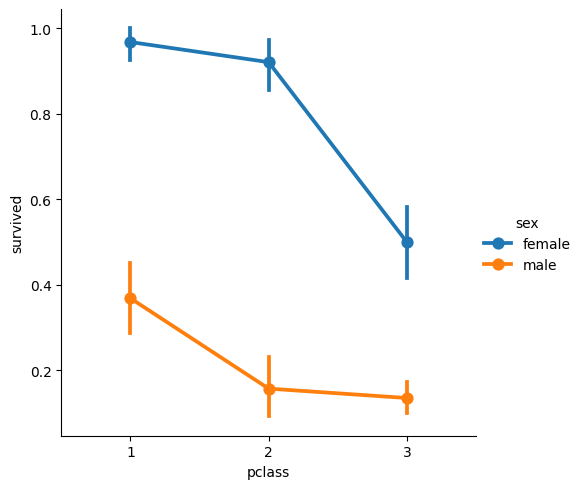

In [47]:
sns.catplot(data=titanic,x='pclass', y='survived', hue='sex', kind='point')
plt.show()

변수 사이의 상관계수를 히트맵으로 시각화
  - 나이를 범주형으로 변경 0 1 2 3 4 5 6 7

In [61]:
titanic['age'] = titanic.groupby(['pclass','sex'])['age'].transform('mean')

In [64]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = list(range(10))
titanic['age2'] = pd.cut(titanic['age'],bins=bins, labels=labels,right=False)

In [66]:
titanic['sex'] = titanic['sex'].map({
    'male' : 1,
    'female' : 0
})

In [67]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

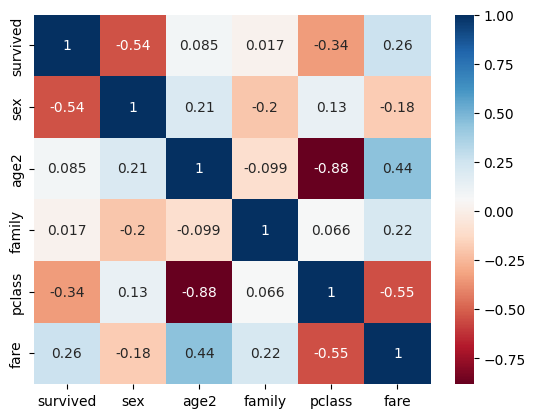

In [69]:
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(),cmap = colormap, annot=True )
plt.show()